In [ ]:
%reload_ext autoreload
%autoreload 2

import os
if not os.path.exists("PYTHON"):
    print("the directory small_libs is created")
    !git clone https://github.com/vincentvigon/PYTHON
else:
    print("the directory small_libs is updated")
    %cd PYTHON
    !git pull https://github.com/vincentvigon/PYTHON
    %cd ..

the directory small_libs is created
Cloning into 'PYTHON'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git clone https://github.com/vincentvigon/small_libs

Cloning into 'small_libs'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 339 (delta 44), reused 91 (delta 24), pack-reused 221
Receiving objects: 100% (339/339), 38.22 MiB | 25.01 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [4]:
!git clone https://github.com/vincentvigon/PYTHON

Cloning into 'PYTHON'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from solvers.grid_to_plot import Grid_to_plot
from solvers.slope_solver import *

In [ ]:
def test_solvers():
    nx = 400
    BC = "neumann"
    #CFL = 0.5
    xmin = 0.
    xmax = 1.
    tmax=0.1
    dx = (xmax - xmin) / nx
    dt_over_dx = 0.3
    dt = dt_over_dx * dx
    nt = int(tmax / dt)

    #ts = tf.linspace(0., tmax, nt)
    xs = tf.linspace(xmin, xmax, nx)

    w_init=tf.sin(2*np.pi*xs)[tf.newaxis,:,tf.newaxis]

    Re=5
    if Re is not None:
        solver=SolverWithDiffusion(nx,dx,dt,BC,flux_fn_burger,Re)
    else:
        solver=SolverFromL(nx,dx,dt,BC,flux_fn_burger)

    U,_,_ = solver.compute_solution_allTimes(nt,w_init)
    U=U[:,0,:,0]

    fig,ax=plt.subplots()
    grid=Grid_to_plot(nx,xmin,xmax,nt,tmax)
    grid.plot_several_times(ax,U)

    plt.show()

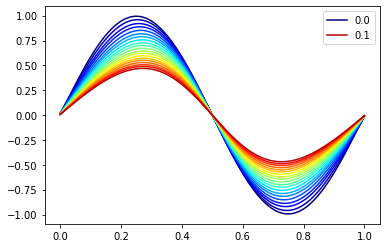

In [ ]:
test_solvers()